# Setup

In [ ]:
!pip install dython
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from plotnine import *
from math import pi
import matplotlib.pyplot as plt
from sklearn import preprocessing
import dython
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Cleaning

Load datasets into notebook

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/playlists.csv")
df

,Name,Artists,Album,Duration(ms),Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
0,U Went 2 Far,"Luca Lozano,Mr. Ho",Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.002750,0.796,0.780,0.890,0.0763,-14.818,0.0746,0.430,125.015,Disco
1,Different Circles,"Luca Lozano,Mr. Ho",Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.115000,0.807,0.642,0.780,0.1110,-8.609,0.1510,0.453,119.984,Disco
2,Dripbox,"Luca Lozano,Mr. Ho",Dripbox,363518,False,3,7.0,1.0,4.0,0.075600,0.784,0.727,0.885,0.0784,-8.169,0.0463,0.476,123.004,Disco
3,Bear Samurai,"Luca Lozano,Mr. Ho",Dripbox,368441,False,1,1.0,1.0,4.0,0.161000,0.794,0.888,0.898,0.0466,-9.303,0.0688,0.637,126.042,Disco
4,Hot Trak,"Luca Lozano,Mr. Ho",Dripbox,308285,False,2,8.0,1.0,4.0,0.000064,0.755,0.785,0.819,0.2850,-11.734,0.0423,0.146,119.991,Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14846,SexyBack (feat. Timbaland),"Justin Timberlake,Timbaland",FutureSex/LoveSounds,242733,True,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14847,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink",Reflection (Deluxe),224573,False,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14848,Run the World (Girls),Beyoncé,4,236093,False,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14849,Jai Ho! (You Are My Destiny),"A.R. Rahman,The Pussycat Dolls,Nicole Scherzinger",Jai Ho! (You Are My Destiny),222400,False,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks


### Check for imabalances in our data

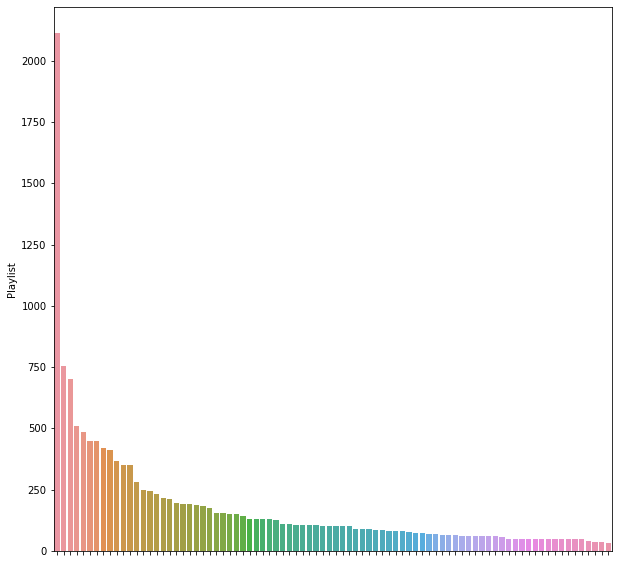

In [ ]:
# We want to see the dritibution of our playlists
plt.figure(figsize=(10,10))

sns.barplot(x=df.Playlist.value_counts().index,
            y=df.Playlist.value_counts()).set(xticklabels=[])
plt.show()

In [ ]:
# As we can see there are imbalances in our data
mean_song_count = int(df.Playlist.value_counts().mean())
max_song_count = int(df.Playlist.value_counts().max())
min_song_count = int(df.Playlist.value_counts().min())
std_songs = int(df.Playlist.value_counts().std())
print(f'Mean: {mean_song_count} songs, Max: {max_song_count} songs, Min: {min_song_count} songs, Std: {std_songs}')

Mean: 176 songs, Max: 2113 songs, Min: 32 songs, Std: 258


No handles with labels found to put in legend.


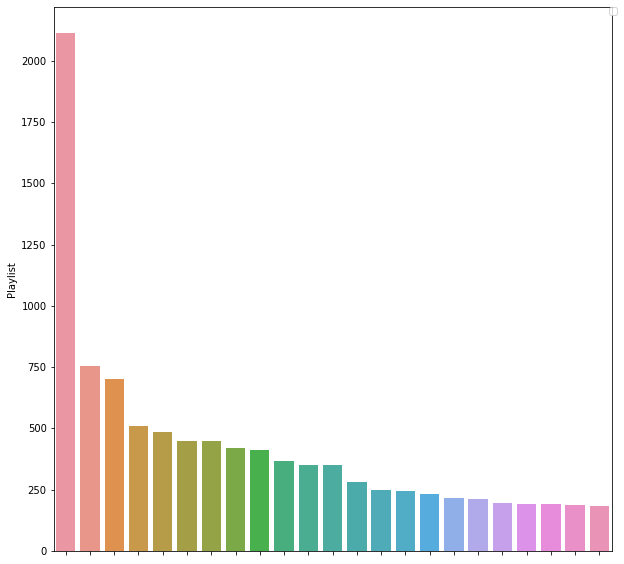

['Janngueo',
 'Rap(TLob)',
 'EDM(TLob)',
 'RapEspanol(TLob)',
 'Classics',
 'Dinner Tracks',
 'LofiBeats',
 'TheFeelsChico',
 'Espanola',
 'Reggaeton',
 'Workout Tracks',
 'Sleep Tracks',
 'Espanoladas',
 'Party Tracks',
 'AllNightLong',
 'Folk',
 'Oldgramphone',
 'PowerHour',
 'Yoga',
 'Chill',
 'BonfireSongs',
 'DeepFocus',
 'Slap']

In [ ]:
# We want to see the playlist that create imbalances in our data
plt.figure(figsize=(10,10))
sns.barplot(x=df.Playlist.value_counts().loc[lambda count: count>mean_song_count].index,
            y=df.Playlist.value_counts().loc[lambda count: count>mean_song_count]).set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()
df.Playlist.value_counts().loc[lambda count: count>mean_song_count].index.tolist()

In [ ]:
# Lets get rid of the excesive songs that create imbalances in our data
# We can see above that the playlists creating imbalances are: Janngueo, Rap(TLob), EDM(TLob), RapEspanol(TLob),...
# Downsampling (mean is 168 songs/playlist)
imbalanced_playlists = df.Playlist.value_counts().loc[lambda count: count>mean_song_count].index.tolist()

for playlist in imbalanced_playlists:
    songs_removed = 0
    playlist_songs = df.loc[df['Playlist'] == playlist]
    num_songs_to_remove = abs(mean_song_count-len(playlist_songs))
    for index,row in playlist_songs.iterrows():
      songs_removed = songs_removed + 1
      df.drop(df[(df['Playlist'] == row['Playlist']) & (df['Name'] == row['Name'])].index, inplace = True)
      if songs_removed == num_songs_to_remove:
        break

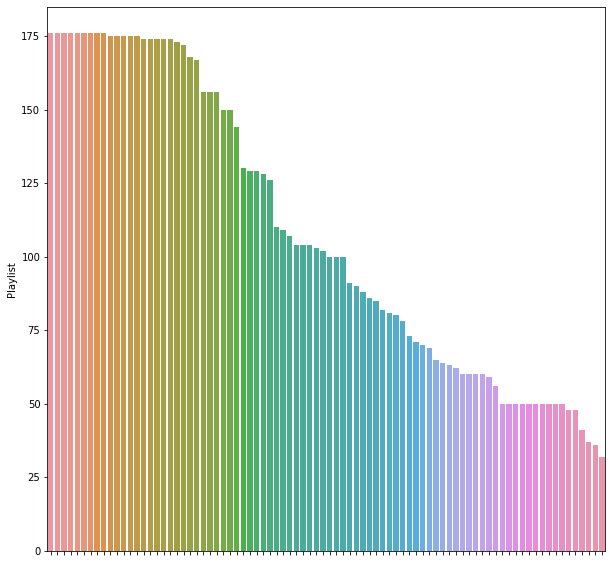

Mean: 108 songs, Max: 176 songs, Min: 32 songs, Std: 50


In [ ]:
# Lets see the new distribution after balancing our data
plt.figure(figsize=(10,10))
sns.barplot(x=df.Playlist.value_counts().index,
            y=df.Playlist.value_counts()).set(xticklabels=[])
plt.show()

# As we can see there are imbalances in our data
mean_song_count = int(df.Playlist.value_counts().mean())
max_song_count = int(df.Playlist.value_counts().max())
min_song_count = int(df.Playlist.value_counts().min())
std_songs = int(df.Playlist.value_counts().std())
print(f'Mean: {mean_song_count} songs, Max: {max_song_count} songs, Min: {min_song_count} songs, Std: {std_songs}')

### Check for Missing values

In [ ]:
df[df.isnull().any(axis=1)]

,Name,Artists,Album,Duration(ms),Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
263,Freaky Friday (feat. Chris Brown),"Lil Dicky,Chris Brown",Freaky Friday (feat. Chris Brown),216631,True,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrivingList
264,Good Time,"Owl City,Carly Rae Jepsen",The Midsummer Station,205933,False,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrivingList
265,Since U Been Gone,Kelly Clarkson,Breakaway,188960,False,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrivingList
266,You're The One That I Want - From “Grease”,"John Travolta,Olivia Newton-John",Grease (The Original Motion Picture Soundtrack),169840,False,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrivingList
267,"I Just Can't Wait to Be King - From ""The Lion ...","Jason Weaver,Rowan Atkinson,Laura Williams",The Lion King,170880,False,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrivingList
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14846,SexyBack (feat. Timbaland),"Justin Timberlake,Timbaland",FutureSex/LoveSounds,242733,True,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14847,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink",Reflection (Deluxe),224573,False,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14848,Run the World (Girls),Beyoncé,4,236093,False,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks
14849,Jai Ho! (You Are My Destiny),"A.R. Rahman,The Pussycat Dolls,Nicole Scherzinger",Jai Ho! (You Are My Destiny),222400,False,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workout Tracks


Let's see which playlists have missing values and how much percentage of the each playlist has missing values

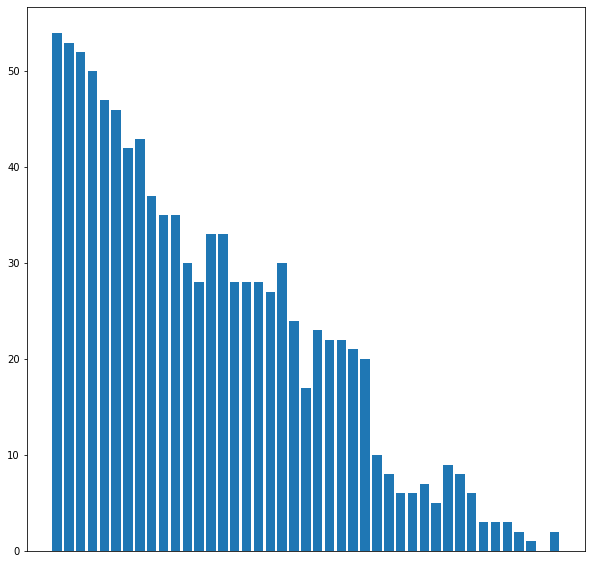

In [ ]:
playlists_percentage_nan = df.Playlist.loc[df.isnull().any(axis=1)].value_counts().to_dict()
for key, value in playlists_percentage_nan.items():
  playlists_percentage_nan[key] = int(100*(value/len(df.loc[df['Playlist'] == key])))

plt.figure(figsize=(10,10))
plt.bar(playlists_percentage_nan.keys(), playlists_percentage_nan.values())
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

We can safely remove the missing values from the playlists since we will never be lossing a whole playlist. In the worst case we loose half a playlist but we will take this as acceptable

In [ ]:
df.dropna(inplace=True)
df['Playlist'].unique()

array(['Disco', 'DubReggae', 'DrivingList', 'LemmeGetAux', 'ImVibing',
       'CryAnywhereAnytime', 'FullVolume', 'AllNightLong',
       'LateNightDrives', 'SingingAtTopOfOurLungs', 'Tuff', 'PaPerrial',
       'Rap(TLob)', 'RapEspanol(TLob)', 'EDM(TLob)', 'Espanoladas(TLob)',
       'MyJam(TLob)', 'HeadBangers', 'DailyMix1', 'DailyMix2',
       'DailyMix3', 'DailyMix4', 'DailyMix5', 'DailyMix6', 'Janngueo',
       'ElectronicRunning', 'Yoga', 'Metal', 'OldMetal', 'NewBlood',
       'Blues', 'BlueBallads', 'BluesClassics', 'PunkEspanol',
       'PunkClassic', '2000sPunk', 'PunkUnleashed', 'NewBoots',
       '90sCountry', 'CountryNights', 'ChilloutSoul', 'RelaxBrunch',
       'SoulnCity', 'PopClasico', 'PopEspanol', 'Dope', 'GoldSchool',
       'BonfireSongs', 'KPop2020', '90sRock', 'Tomorrowland', 'Legit',
       'Nigro', 'Reggaeton', 'Chill', 'Espanola', 'Romanticism',
       'Espanoladas', 'JazzAndCigarettes', 'Folk', 'Slap', 'Progressive',
       'Oldgramphone', 'Andiamo', 'Nice', 'C

Lets see how is our distribution of songs per playlists after removing missing values

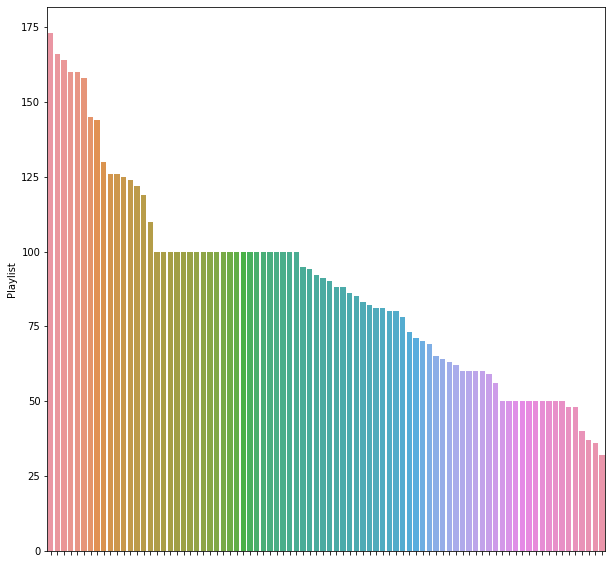

Mean: 88 songs, Max: 173 songs, Min: 32 songs, Std: 33


In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.Playlist.value_counts().index,
            y=df.Playlist.value_counts()).set(xticklabels=[])
plt.show()

mean_song_count = int(df.Playlist.value_counts().mean())
max_song_count = int(df.Playlist.value_counts().max())
min_song_count = int(df.Playlist.value_counts().min())
std_songs = int(df.Playlist.value_counts().std())
print(f'Mean: {mean_song_count} songs, Max: {max_song_count} songs, Min: {min_song_count} songs, Std: {std_songs}')

### Restructure our data columns

In [ ]:
# Break artists into different songs:
  # Name     Artists                  Playlist AudioFeatures       ->            Name     Artists Playlist AudioFeatures
  # Safaera  BadBunny, Anuel, Mozart hOLA     X                                 Safaera  BadBunny hOLA     X
  #                                                                             ""        Anuel   ""        ""
  #                                                                             ""        Mozart  ""        ""
df_multiple_artist = df.copy()
df_multiple_artist['Artists'] = df_multiple_artist['Artists'].str.split(',')
df_multiple_artist = df_multiple_artist.explode('Artists').reset_index(drop=True)
df_multiple_artist

,Name,Artists,Album,Duration(ms),Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
0,U Went 2 Far,Luca Lozano,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.00275,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
1,U Went 2 Far,Mr. Ho,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.00275,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
2,Different Circles,Luca Lozano,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.11500,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
3,Different Circles,Mr. Ho,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.11500,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
4,Dripbox,Luca Lozano,Dripbox,363518,False,3,7.0,1.0,4.0,0.07560,0.784,0.727,0.885000,0.0784,-8.169,0.0463,0.476,123.004,Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,Rollercoaster,Alyssa Reid,Rollercoaster,193493,False,27,4.0,1.0,4.0,0.05350,0.746,0.930,0.000004,0.0636,-3.852,0.1440,0.811,104.914,Workout Tracks
10562,The Best Crew - Leeyou & Danceey Remix,Tep No,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.07230,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks
10563,The Best Crew - Leeyou & Danceey Remix,Leeyou & Danceey,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.07230,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks
10564,Destination Sunrise,Bit Funk,Destination Sunrise,198727,False,27,1.0,1.0,4.0,0.00189,0.611,0.838,0.052500,0.0892,-3.489,0.0371,0.431,107.988,Workout Tracks


In [ ]:
## We might to instead of exploding a song into different artists, just keep the song with the first artist in the aritsts list
#        This is because in training we dont want to give more importance to playlists (classes) which have songs with a lot of collabs
#        This will make the model bias towards the playlists with most collabs in it, instead of generalising
df_one_artist = df
df_one_artist['Artists'] = df_one_artist['Artists'].str.split(',')
for idx, row in df_one_artist.iterrows():
  df_one_artist.at[idx,'Artists'] = row['Artists'][0]
df_one_artist

,Name,Artists,Album,Duration(ms),Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
0,U Went 2 Far,Luca Lozano,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.002750,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
1,Different Circles,Luca Lozano,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.115000,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
2,Dripbox,Luca Lozano,Dripbox,363518,False,3,7.0,1.0,4.0,0.075600,0.784,0.727,0.885000,0.0784,-8.169,0.0463,0.476,123.004,Disco
3,Bear Samurai,Luca Lozano,Dripbox,368441,False,1,1.0,1.0,4.0,0.161000,0.794,0.888,0.898000,0.0466,-9.303,0.0688,0.637,126.042,Disco
4,Hot Trak,Luca Lozano,Dripbox,308285,False,2,8.0,1.0,4.0,0.000064,0.755,0.785,0.819000,0.2850,-11.734,0.0423,0.146,119.991,Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,How to Love (feat. Sofia Reyes),Cash Cash,"Blood, Sweat & 3 Years",219240,False,50,0.0,1.0,4.0,0.148000,0.673,0.894,0.000003,0.1410,-2.730,0.0594,0.630,118.894,Workout Tracks
14797,Been A While,Sam Feldt,Been A While EP,163526,False,0,1.0,0.0,4.0,0.425000,0.779,0.695,0.000769,0.1070,-6.064,0.0310,0.392,120.004,Workout Tracks
14798,Rollercoaster,Alyssa Reid,Rollercoaster,193493,False,27,4.0,1.0,4.0,0.053500,0.746,0.930,0.000004,0.0636,-3.852,0.1440,0.811,104.914,Workout Tracks
14799,The Best Crew - Leeyou & Danceey Remix,Tep No,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.072300,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks


In [ ]:
# Renaming 
def rename(dataframe):
  dataframe.rename(columns={'Artists':'Artist'}, inplace=True )
  dataframe.rename(columns={'Duration(ms)':'Duration'}, inplace=True)
  dataframe.rename(index={'Dinner Track':'Dinner Tracks'}, inplace=True)
  dataframe.rename(index={'Party Track':'Party Trakcs'}, inplace=True)
  dataframe.rename(index={'Sleep Track':'Sleep Tracks'}, inplace=True)
  dataframe.rename(index={'Workout Track':'Workout Tracks'}, inplace=True)
rename(df_multiple_artist)
rename(df_one_artist)

Now, we save our clean dataset in order to use it in our models

In [ ]:
df_one_artist.to_csv("/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/clean-playlists-one-artist.csv", index=False)
df_one_artist

,Name,Artist,Album,Duration,Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
0,U Went 2 Far,Luca Lozano,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.002750,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
1,Different Circles,Luca Lozano,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.115000,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
2,Dripbox,Luca Lozano,Dripbox,363518,False,3,7.0,1.0,4.0,0.075600,0.784,0.727,0.885000,0.0784,-8.169,0.0463,0.476,123.004,Disco
3,Bear Samurai,Luca Lozano,Dripbox,368441,False,1,1.0,1.0,4.0,0.161000,0.794,0.888,0.898000,0.0466,-9.303,0.0688,0.637,126.042,Disco
4,Hot Trak,Luca Lozano,Dripbox,308285,False,2,8.0,1.0,4.0,0.000064,0.755,0.785,0.819000,0.2850,-11.734,0.0423,0.146,119.991,Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,How to Love (feat. Sofia Reyes),Cash Cash,"Blood, Sweat & 3 Years",219240,False,50,0.0,1.0,4.0,0.148000,0.673,0.894,0.000003,0.1410,-2.730,0.0594,0.630,118.894,Workout Tracks
14797,Been A While,Sam Feldt,Been A While EP,163526,False,0,1.0,0.0,4.0,0.425000,0.779,0.695,0.000769,0.1070,-6.064,0.0310,0.392,120.004,Workout Tracks
14798,Rollercoaster,Alyssa Reid,Rollercoaster,193493,False,27,4.0,1.0,4.0,0.053500,0.746,0.930,0.000004,0.0636,-3.852,0.1440,0.811,104.914,Workout Tracks
14799,The Best Crew - Leeyou & Danceey Remix,Tep No,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.072300,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks


In [ ]:
df_multiple_artist.to_csv("/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/clean-playlists-multiple-artist.csv", index=False)
df_multiple_artist

,Name,Artist,Album,Duration,Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist
0,U Went 2 Far,Luca Lozano,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.00275,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
1,U Went 2 Far,Mr. Ho,Visions of Rhythm 2 EP,362804,False,2,10.0,0.0,4.0,0.00275,0.796,0.780,0.890000,0.0763,-14.818,0.0746,0.430,125.015,Disco
2,Different Circles,Luca Lozano,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.11500,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
3,Different Circles,Mr. Ho,Dobb Meep / Different Circles,419013,False,27,11.0,0.0,4.0,0.11500,0.807,0.642,0.780000,0.1110,-8.609,0.1510,0.453,119.984,Disco
4,Dripbox,Luca Lozano,Dripbox,363518,False,3,7.0,1.0,4.0,0.07560,0.784,0.727,0.885000,0.0784,-8.169,0.0463,0.476,123.004,Disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561,Rollercoaster,Alyssa Reid,Rollercoaster,193493,False,27,4.0,1.0,4.0,0.05350,0.746,0.930,0.000004,0.0636,-3.852,0.1440,0.811,104.914,Workout Tracks
10562,The Best Crew - Leeyou & Danceey Remix,Tep No,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.07230,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks
10563,The Best Crew - Leeyou & Danceey Remix,Leeyou & Danceey,The Best Crew (Remixes),215270,False,16,3.0,0.0,4.0,0.07230,0.602,0.773,0.000000,0.1260,-4.846,0.0448,0.383,97.012,Workout Tracks
10564,Destination Sunrise,Bit Funk,Destination Sunrise,198727,False,27,1.0,1.0,4.0,0.00189,0.611,0.838,0.052500,0.0892,-3.489,0.0371,0.431,107.988,Workout Tracks


# Data Study

**Using only one artist for each song**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/clean-playlists-one-artist.csv")
df.columns

Index(['Name', 'Artist', 'Album', 'Duration', 'Explicit', 'Popularity', 'Key',
       'Mode', 'Time Signature', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Valence',
       'Tempo', 'Playlist'],
      dtype='object')

**Or using multiple artist for each song, implying songs with more artists are have stronger impact on the model**

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/clean-playlists-multiple-artist.csv")
#df

## Statistics

### Mean for all features

In [ ]:
df.describe()

,Duration,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
count,7.459000e+03,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000,7459.000000
mean,2.309288e+05,43.614023,5.243732,0.629441,3.914064,0.304876,0.599851,0.631308,0.161811,0.188413,-8.223374,0.092938,0.497713,120.632146
std,1.256848e+05,25.437923,3.588981,0.482987,0.390953,0.325842,0.176942,0.246977,0.312479,0.156279,5.067781,0.093298,0.254897,29.549113
min,3.062200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001330,0.000000,0.012000,-41.883000,0.000000,0.000000,0.000000
25%,1.809100e+05,27.000000,2.000000,0.000000,4.000000,0.022450,0.486000,0.473000,0.000000,0.094650,-10.053000,0.038000,0.290000,96.993000
50%,2.106260e+05,49.000000,5.000000,1.000000,4.000000,0.169000,0.623000,0.675000,0.000064,0.123000,-6.839000,0.054100,0.503000,120.037000
75%,2.518985e+05,63.000000,8.000000,1.000000,4.000000,0.532500,0.731000,0.832000,0.071400,0.241000,-4.881500,0.102000,0.709000,137.926500
max,4.500036e+06,100.000000,11.000000,1.000000,5.000000,0.996000,0.987000,1.000000,0.994000,0.986000,-0.819000,0.811000,0.980000,213.973000


In [ ]:
print(df['Artist'].describe()) #TODO: Artists empty?
print(df['Album'].describe()) #TODO: Albums with 0.0??

count          7459
unique         3550
top       Bad Bunny
freq             47
Name: Artist, dtype: object
count                                                  7459
unique                                                 5539
top       Lady Day: The Complete Billie Holiday On Colum...
freq                                                     46
Name: Album, dtype: object


### Correlation Matrix


#### Pearson's Corrleation Matrix

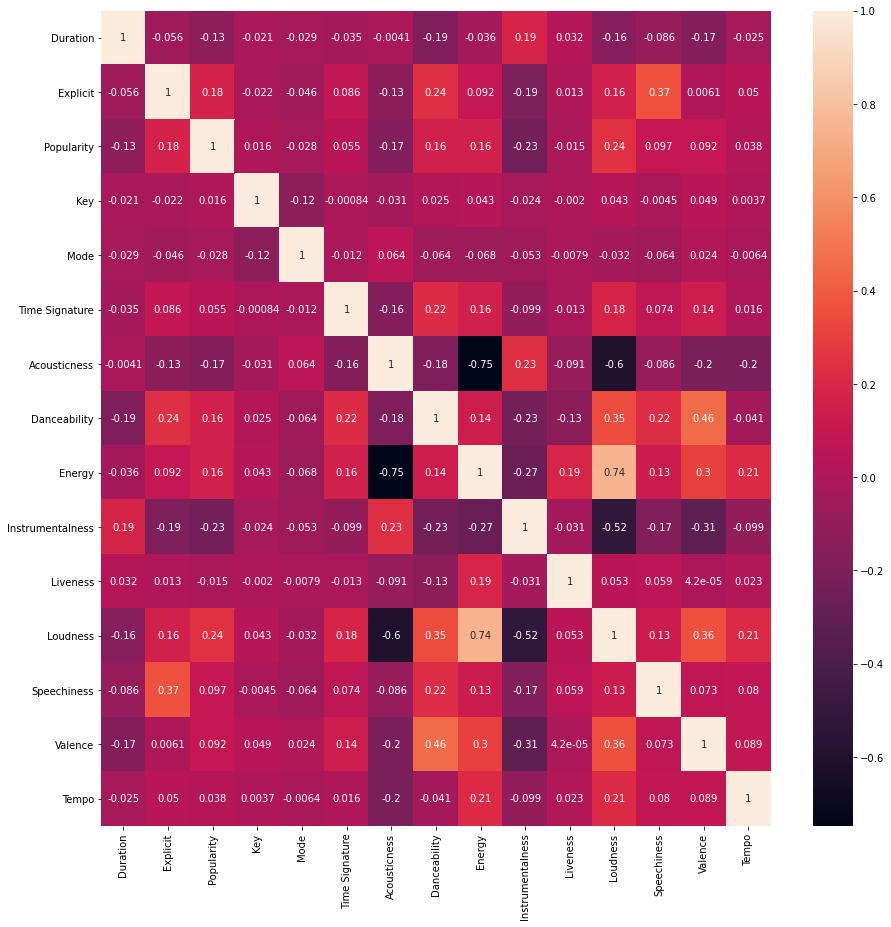

Acousticness      Energy              0.747417
Energy            Acousticness        0.747417
Loudness          Energy              0.742474
Energy            Loudness            0.742474
Loudness          Acousticness        0.600031
Acousticness      Loudness            0.600031
Instrumentalness  Loudness            0.516126
Loudness          Instrumentalness    0.516126
Valence           Danceability        0.458728
Danceability      Valence             0.458728
dtype: float64

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)[15:]
so.head(n=10)

#### Categorial and Continuous Correlation Matrix
We use both Cramer's V and Theil's U for computing conditional entropys among values

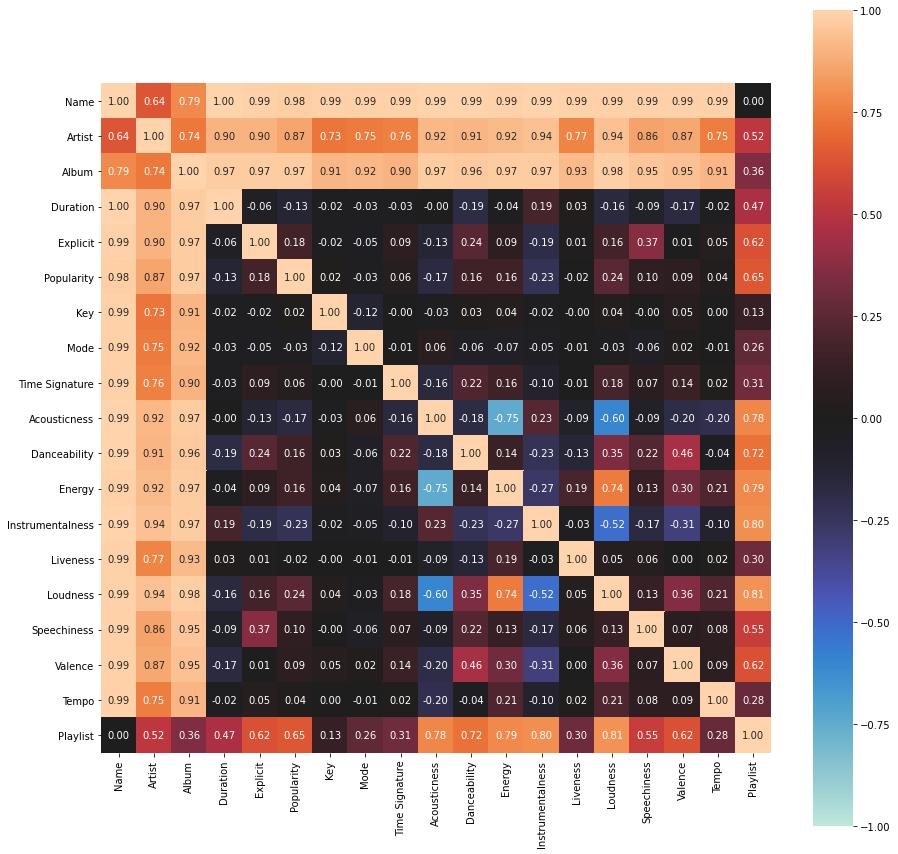

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f01e30c0d30>,
 'corr':                       Name    Artist     Album  ...   Valence     Tempo  Playlist
 Name              1.000000  0.638776  0.787340  ...  0.990573  0.988621  0.000000
 Artist            0.638776  1.000000  0.738463  ...  0.867302  0.750917  0.520227
 Album             0.787340  0.738463  1.000000  ...  0.945119  0.908444  0.358687
 Duration          0.997088  0.899070  0.971080  ... -0.166310 -0.024572  0.465067
 Explicit          0.986626  0.901399  0.974753  ...  0.006142  0.049687  0.617603
 Popularity        0.977090  0.866682  0.973510  ...  0.092282  0.037523  0.646774
 Key               0.988229  0.733770  0.909207  ...  0.049269  0.003682  0.132348
 Mode              0.988292  0.749580  0.915266  ...  0.023524 -0.006399  0.261130
 Time Signature    0.990303  0.764489  0.899393  ...  0.136945  0.015660  0.307423
 Acousticness      0.992458  0.921165  0.968867  ... -0.195130 -0.203631  0.777217
 Danceability

In [ ]:
dython.nominal.associations(df, figsize=(15,15))

We can observe that **Artist, Explicit, Popularity, Acousticness, Danceability, Energy, Instrumentalness, Loudness and Valence** are the strongest correlated features with our **Playlist** feature

#### Conditional Entropies

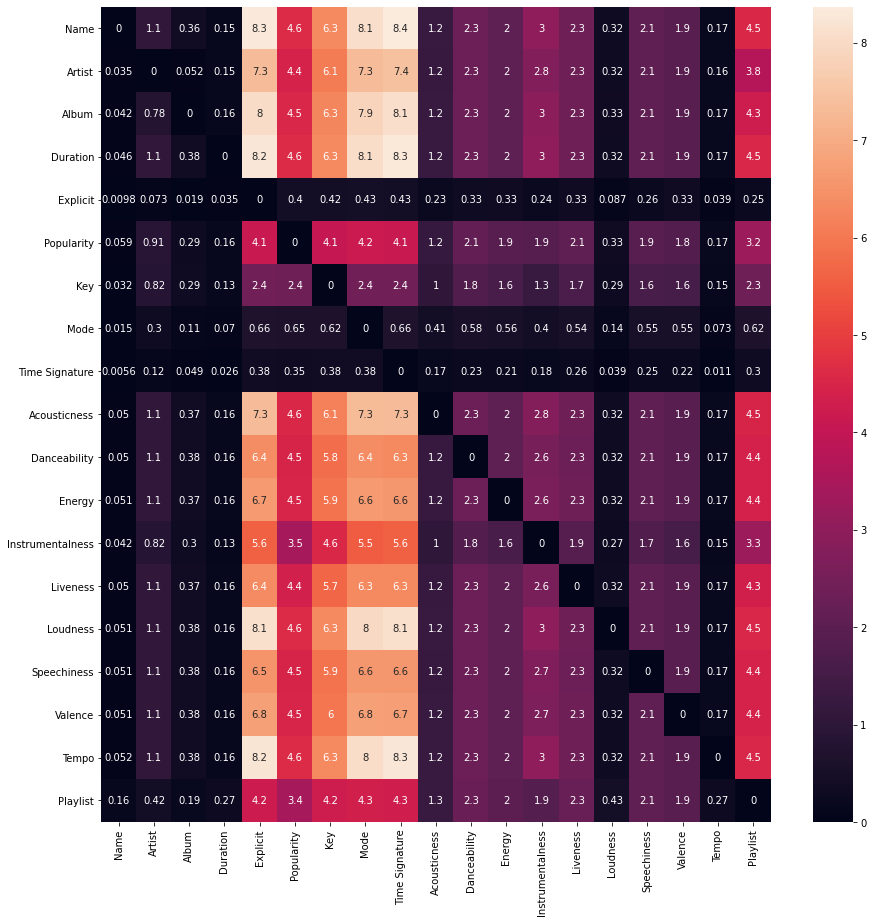

In [ ]:
# Cond_entropy(y,x) = 0 -> y is completely determined by value of X -> the lower cond_entropy the better
cond_entropy = {}

for col1 in df.columns:
  cond_entropy[col1] = {}
  for col2 in df.columns:
    cond_entropy[col1][col2] = dython.nominal.conditional_entropy(df[col1],df[col2])


cond_entropy_df = pd.DataFrame.from_dict(cond_entropy, orient='index')
plt.figure(figsize=(15,15))
sns.heatmap(cond_entropy_df, annot=True)
plt.show()
# Verical is X , Y is horizontal
# i.e: The amount of information that I need to describe Name knowing Album is 0.33

We can observe that knowing song's **Name** and **Artist**, the **Album**, the **Loudness**, the **Duration** and the **Tempo** we need very little additional information to determine the playlist.

As we can observe from the plots the features that best allow us to determine the playlist label are:
* Energy, Instrumentalness, Loudness, Acousticness, Danceability, Popularity, Tempo, Duration, Name, Artist, Album

Therefore, we are going to get rid of all other features.

However we can also see there is strong correlations between:

* Energy - Loudness (0.77)
* Energy - Acousticness (0.75)
* Loudness - Acousticness (0.62)
* Loudness - Instrumentalness (0.55)

Hence, we are going to throw away Energy since we get the same info from Acousticness and Loudness. We choose to discard Energy over Loudness since Loudnes has correlation with Playlist of 0.83 and Energy 0.8

From the rest of the features we are unsure about keeping:
* Popularity, Name, Tempo, Artist, Duration and Album

Despite Popularity having strong correlation with Playlist, we can see from its conditional entropy that knowing it leaves us with a lot information left to determine the Playlist.

On the other hand, the rest of the features we are unsure about (Tempos, Name, Artist, Duration and Album) tell us a lot of information about the playlist as we see from their conditional entropies. However, they have kind of weak correlations with the playlist label.

To summarize, we keep at least for now:
* Instrumentalness, Loudness, Acousticness, Danceability, Popularity, Tempo, Duration, Name, Artist, Album

In [ ]:
df.groupby('Playlist').mean().reset_index()

,Playlist,Duration,Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,2000sPunk,222831.460000,0.110000,42.860000,4.580000,0.530000,3.910000,0.005908,0.367460,0.919090,0.022362,0.259090,-4.306230,0.108577,0.347484,141.079020
1,90sCountry,203537.171875,0.000000,59.546875,5.890625,0.953125,3.921875,0.236602,0.643516,0.689547,0.000042,0.195695,-7.666516,0.034127,0.710922,129.457484
2,90sRock,251686.500000,0.130000,48.770000,5.840000,0.720000,3.910000,0.045683,0.470800,0.766530,0.061290,0.185814,-7.142060,0.057110,0.543770,122.154410
3,AllNightLong,212309.484615,0.461538,52.815385,4.853846,0.630769,3.969231,0.125410,0.698862,0.689677,0.034909,0.198515,-5.857038,0.132554,0.506436,126.002677
4,AllOuts00s,234794.810000,0.100000,54.080000,4.860000,0.580000,4.000000,0.154664,0.673650,0.699800,0.004142,0.173181,-5.832620,0.079484,0.597620,116.544070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Tomorrowland,182621.760000,0.080000,56.800000,4.810000,0.490000,3.980000,0.097534,0.660410,0.796640,0.047079,0.190298,-5.115730,0.072811,0.462600,124.178210
80,Tuff,220044.937500,0.968750,63.250000,5.187500,0.531250,4.031250,0.105689,0.794313,0.642531,0.000919,0.204616,-6.404719,0.215847,0.491719,136.670094
81,Verano2020,211154.420000,0.370000,77.010000,5.540000,0.470000,4.020000,0.230560,0.762970,0.725690,0.002244,0.141102,-4.493150,0.138186,0.654610,129.976810
82,Workout Tracks,228809.277311,0.579832,32.201681,5.168067,0.613445,4.016807,0.071659,0.676723,0.790118,0.055282,0.252831,-4.659437,0.169355,0.422665,128.913630


## Analyzing doubtfull features

### Popularity

In [ ]:
continuous_columns = ['Duration', 'Popularity', 'Key', 'Mode', 'Time Signature', 'Acousticness', 'Explicit',
                      'Danceability',	'Energy',	'Instrumentalness',	'Liveness',	'Loudness',	'Speechiness', 'Valence', 'Tempo']
continuous_df = df[continuous_columns]
x = continuous_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=continuous_columns)

#scaled_df = scaled_df.join(df['Playlist']).join(df['Name']).join(df['Artist']).join(df['Album'])
scaled_df['Playlist'] = df['Playlist'].values
scaled_df['Name'] = df['Name'].values
scaled_df['Album'] = df['Album'].values

scaled_df

,Duration,Popularity,Key,Mode,Time Signature,Acousticness,Explicit,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist,Name,Album
0,0.074323,0.02,0.909091,0.0,0.8,0.002761,0.0,0.806484,0.779707,0.895372,0.066016,0.659093,0.091985,0.438776,0.584256,Disco,U Went 2 Far,Visions of Rhythm 2 EP
1,0.086900,0.27,1.000000,0.0,0.8,0.115462,0.0,0.817629,0.641523,0.784708,0.101643,0.810296,0.186190,0.462245,0.560744,Disco,Different Circles,Dobb Meep / Different Circles
2,0.074483,0.03,0.636364,1.0,0.8,0.075904,0.0,0.794326,0.726636,0.890342,0.068172,0.821011,0.057090,0.485714,0.574858,Disco,Dripbox,Dripbox
3,0.075585,0.01,0.090909,1.0,0.8,0.161647,0.0,0.804458,0.887851,0.903421,0.035524,0.793396,0.084834,0.650000,0.589056,Disco,Bear Samurai,Dripbox
4,0.062125,0.02,0.727273,1.0,0.8,0.000064,0.0,0.764944,0.784714,0.823944,0.280287,0.734195,0.052158,0.148980,0.560776,Disco,Hot Trak,Dripbox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,0.042202,0.50,0.000000,1.0,0.8,0.148594,0.0,0.681864,0.893859,0.000003,0.132444,0.953463,0.073243,0.642857,0.555650,Workout Tracks,How to Love (feat. Sofia Reyes),"Blood, Sweat & 3 Years"
7455,0.029736,0.00,0.090909,0.0,0.8,0.426707,0.0,0.789260,0.694594,0.000774,0.097536,0.872273,0.038224,0.400000,0.560837,Workout Tracks,Been A While,Been A While EP
7456,0.036441,0.27,0.363636,1.0,0.8,0.053715,0.0,0.755826,0.929907,0.000004,0.052977,0.926140,0.177559,0.827551,0.490314,Workout Tracks,Rollercoaster,Rollercoaster
7457,0.041314,0.16,0.272727,0.0,0.8,0.072590,0.0,0.609929,0.772698,0.000000,0.117043,0.901934,0.055240,0.390816,0.453384,Workout Tracks,The Best Crew - Leeyou & Danceey Remix,The Best Crew (Remixes)


In [ ]:
mean_pl_df = scaled_df.groupby('Playlist').mean().reset_index()

scores ={}
for index, row in mean_pl_df.iterrows(): 
  scores[row['Playlist']] = row['Duration'] + row['Popularity'] + row['Key'] + row['Mode'] + row['Time Signature'] + \
                            row['Acousticness'] + row['Explicit'] + row['Danceability'] + row['Energy'] + row['Instrumentalness'] + \
                            row['Liveness'] + row['Loudness'] + row['Speechiness'] + row['Valence'] + row['Tempo'] 
  
 
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score']).rename_axis('Playlist').reset_index()
print(scores_df.describe())

for index, row in scaled_df.iterrows(): 
  score = scores_df.loc[scores_df['Playlist'] == row['Playlist']]['Score'].iloc[0]
  scaled_df.at[index,'Score'] = score

scaled_df = scaled_df.groupby('Playlist').mean().reset_index()
scaled_df

           Score
count  84.000000
mean    6.449715
std     0.459747
min     5.302938
25%     6.181259
50%     6.421158
75%     6.790078
max     7.665766


,Playlist,Duration,Popularity,Key,Mode,Time Signature,Acousticness,Explicit,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Score
0,2000sPunk,0.043006,0.428600,0.416364,0.530000,0.782000,0.005931,0.110000,0.372300,0.918982,0.022497,0.253686,0.915078,0.133880,0.354576,0.659331,5.946231
1,90sCountry,0.038689,0.595469,0.535511,0.953125,0.784375,0.237552,0.000000,0.651992,0.689133,0.000042,0.188599,0.833248,0.042080,0.725430,0.605018,6.880262
2,90sRock,0.049462,0.487700,0.530909,0.720000,0.782000,0.045866,0.130000,0.477001,0.766219,0.061660,0.178454,0.846019,0.070419,0.554867,0.570887,6.271464
3,AllNightLong,0.040651,0.528154,0.441259,0.630769,0.793846,0.125913,0.461538,0.708066,0.689264,0.035120,0.191494,0.877313,0.163445,0.516772,0.588872,6.792476
4,AllOuts00s,0.045682,0.540800,0.441818,0.580000,0.800000,0.155285,0.100000,0.682523,0.699400,0.004167,0.165484,0.877907,0.098007,0.609816,0.544667,6.345557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Tomorrowland,0.034009,0.568000,0.437273,0.490000,0.796000,0.097926,0.080000,0.669108,0.796369,0.047363,0.183057,0.895365,0.089779,0.472041,0.580345,6.236636
80,Tuff,0.042382,0.632500,0.471591,0.531250,0.806250,0.106113,0.968750,0.804775,0.642055,0.000924,0.197757,0.863975,0.266149,0.501754,0.638726,7.474951
81,Verano2020,0.040393,0.770100,0.503636,0.470000,0.804000,0.231486,0.370000,0.773019,0.725325,0.002258,0.132548,0.910526,0.170390,0.667969,0.607445,7.179095
82,Workout Tracks,0.044343,0.322017,0.469824,0.613445,0.803361,0.071947,0.579832,0.685636,0.789838,0.055616,0.247260,0.906477,0.208823,0.431291,0.602476,6.832186


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


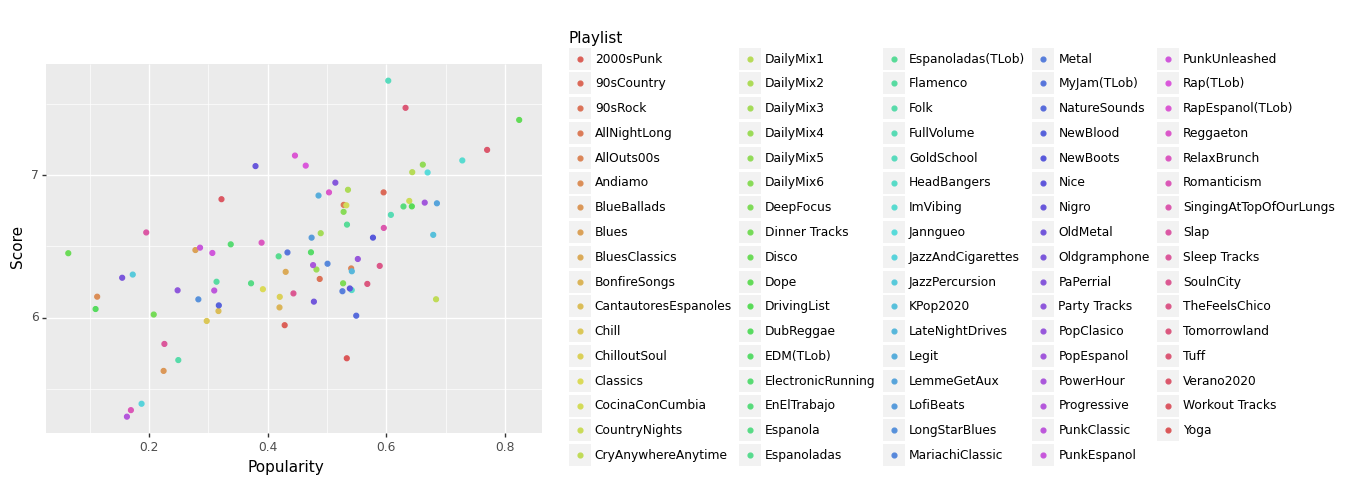

<ggplot: (-9223363308976490282)>

In [ ]:
(
  ggplot(scaled_df, aes(x='Popularity', y='Score', color='Playlist', fill='Playlist'))
    + geom_point(alpha=1)
)
#df['Popularity'].describe()


It is unclear whether Popularity is relevant or not, so we will keep it as for now

### Tempo and Duration

From these plots we can observe Tempo and Duration are actually useless to classify a song since they all have very similar Tempo and Duration. We discard Tempo and Duration from our feature set.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


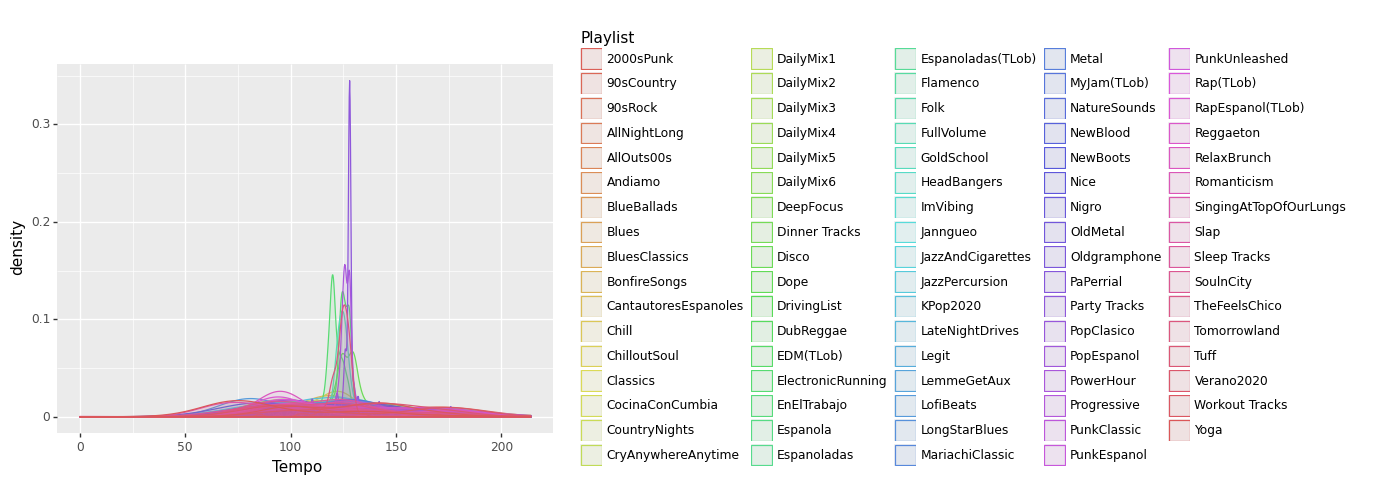

<ggplot: (-9223363308971883495)>

In [ ]:
(
    ggplot(df, aes(x='Tempo', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1)
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 125 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


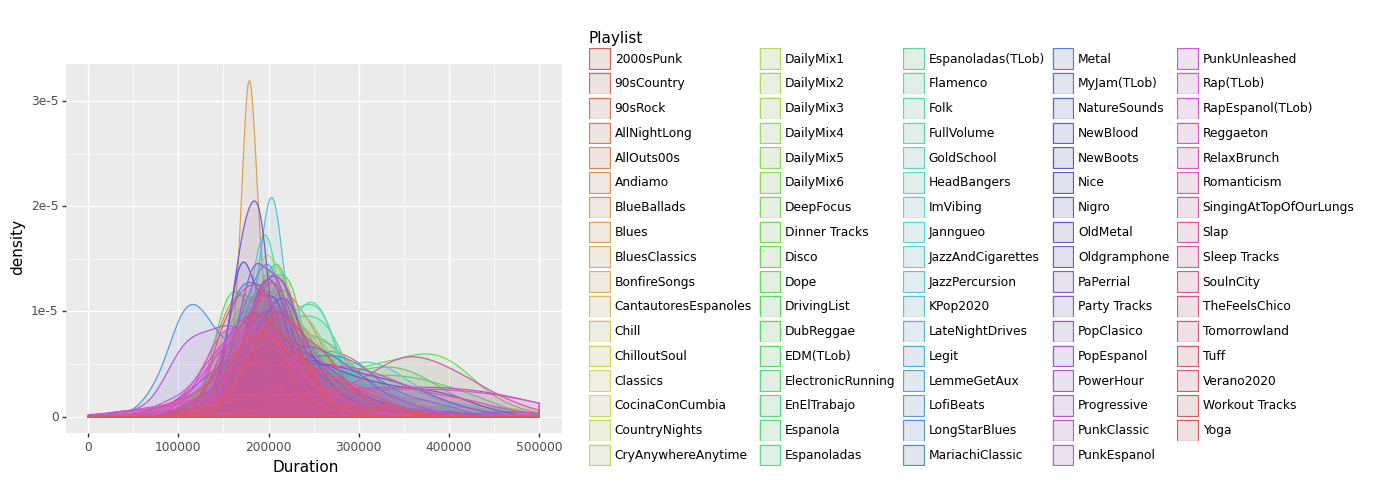

<ggplot: (-9223363308978028456)>

In [ ]:
(
    ggplot(df, aes(x='Duration', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + xlim(0, 500000)
)

### Name, Artist, Album

In [ ]:
artist_album_count={}
albums = {}
artists = {}
for pl in df['Playlist'].unique():
  albums[pl] = set()
  artists[pl] = set()


for index, row in df.iterrows():
    albums[row['Playlist']].add(row['Album'])
    artists[row['Playlist']].add(row['Artist'])

for pl in df['Playlist'].unique():
    artist_album_count[pl] = {}
    artist_album_count[pl]['Album'] = len(albums[pl])
    artist_album_count[pl]['Artist'] = len(artists[pl])

artist_album_count_df = pd.DataFrame.from_dict(artist_album_count, orient='index').rename_axis('Playlist').reset_index()
artist_album_count_df.describe()                   

,Album,Artist
count,84.000000,84.000000
mean,74.952381,55.333333
std,30.271425,27.639823
min,24.000000,9.000000
25%,48.000000,35.750000
50%,73.000000,49.500000
75%,95.500000,73.000000
max,168.000000,146.000000


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


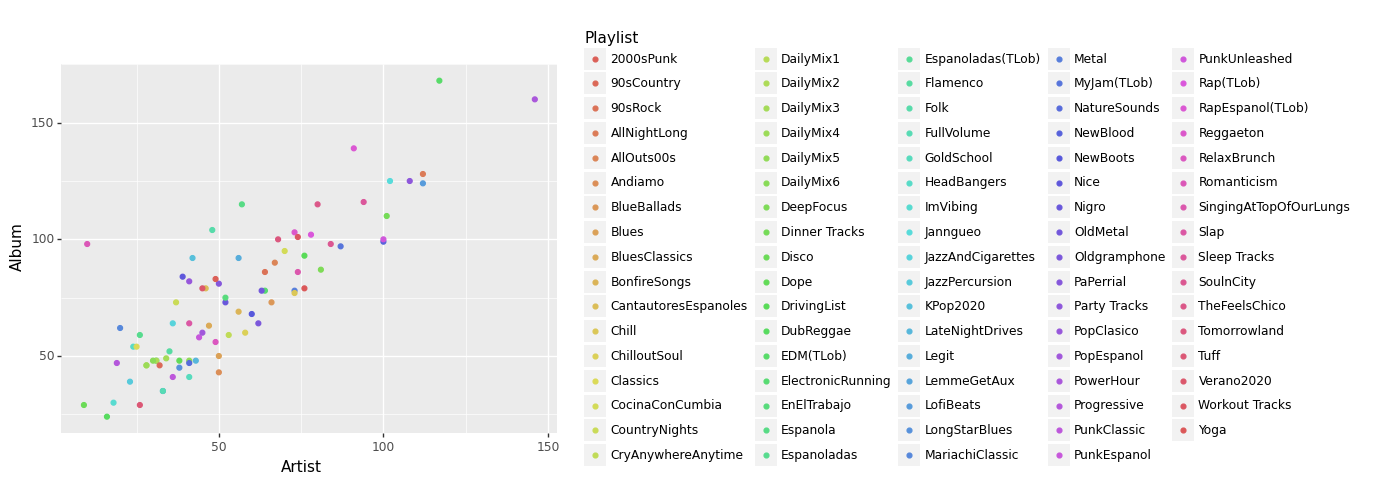

<ggplot: (-9223363308976490254)>

In [ ]:
(
    ggplot(artist_album_count_df, aes(x='Artist', y='Album',color='Playlist', fill='Playlist'))
    + geom_point(alpha=1)
)

We will straight away discard Name since its imposible to classify a song given just a name. We will also discard the Artist. Both Artist and Album are very correlated as we see above and they give similiar information. However Artist does have a stronger correlation with Playlist and also gives us a better conditional entropy when given a Playlist. Therefore we stick with Artist.

To conclude the features that we will work with from now on will be:
* **Acousticness, Danceability, Instrumentalness, Loudness, Popularity and Artist**

Great! We just redcued our feature space from 18 dimensions to 6

# Optimal number of classes


In [ ]:
from plotnine import *
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV

from sklearn.neighbors import KNeighborsClassifier

We will run three different classifiers (Naive Bayes, Random Forest, Knn). 
These will classify with n classes, being n the number of playlist. In  
this Cell an iteration from 1 class to 80 classes will be executed in order to see determine the best classifier and the appropiate number of playlist to use in our model.

In [ ]:
NB={}; RF={}; KNN={}
for n_pl in range(1,len(df.groupby("Playlist").mean())+1):
       
    #Sampling with n_pl different random playlists 
    Random=df.groupby("Playlist").mean().sample(n=n_pl)
    sampled_data=df.loc[df["Playlist"].isin(Random.index)]
    
    #Creating our Features
    X=sampled_data.iloc[:,9:-1]
    features=X.columns

    #Creating our Label 
    y=sampled_data.loc[:,["Playlist"]]

    #Standarize the features
    X_Standarized=StandardScaler().fit_transform(X)
    X_Standarized=pd.DataFrame(X_Standarized)
    X_Standarized.columns=features
    
    #Split your Data
    x_train, x_test, y_train, y_test = train_test_split(X_Standarized, y, test_size=0.1, random_state=1)

    #Naive Bayes Classifier 
    NBClassifier = GaussianNB()
    NBClassifier = NBClassifier.fit(x_train, y_train)

    #Random Forest Classifier
    RFClassifier= RandomForestClassifier(random_state=2)      
    RFClassifier= RFClassifier.fit(x_train,y_train)

    #Knn Classifier
    KNNClassifier = KNeighborsClassifier(n_neighbors=3)
    KNNClassifier.fit(x_train, y_train)

    #Storing Accuracies in dictionaries
    NB[n_pl] = accuracy_score(y_test, NBClassifier.predict(x_test))
    RF[n_pl] = accuracy_score(y_test, RFClassifier.predict(x_test))
    KNN[n_pl] = KNNClassifier.score(x_test,y_test)
    

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykerne

In [ ]:
Accuracy_df=pd.DataFrame(NB.items()).astype(float)
Accuracy_df.columns=["N_Playlists","Accuracy NB" ]
Accuracy_df["Accuracy RF"]=RF.values()
Accuracy_df["Accuracy KNN"]=KNN.values()
Accuracy_df.head(n=20)

,N_Playlists,Accuracy NB,Accuracy RF,Accuracy KNN
0,1.0,1.000000,1.000000,1.000000
1,2.0,0.777778,0.888889,0.777778
2,3.0,0.750000,0.850000,0.800000
3,4.0,0.228571,0.657143,0.571429
4,5.0,0.828571,0.771429,0.771429
5,6.0,0.550000,0.583333,0.533333
6,7.0,0.714286,0.740260,0.675325
7,8.0,0.548387,0.741935,0.629032
8,9.0,0.405660,0.613208,0.556604
9,10.0,0.612903,0.698925,0.548387


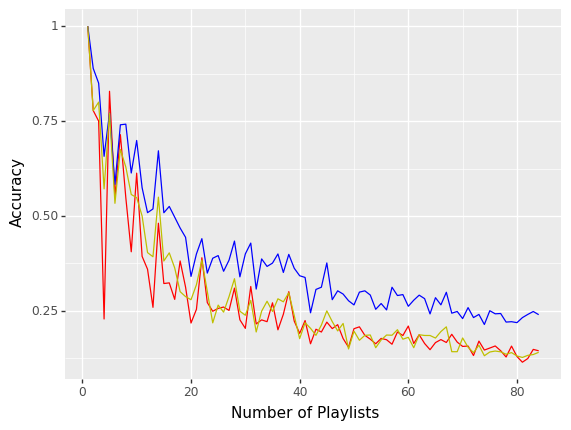

<ggplot: (8727874342057)>

In [ ]:
(
    ggplot(Accuracy_df)+geom_line(aes(x="N_Playlists",y="Accuracy NB"), color="r")
    + geom_line(aes(x="N_Playlists",y="Accuracy RF"), color="b")
    + geom_line(aes(x="N_Playlists",y="Accuracy KNN"), color="y")
    + labs(x = "Number of Playlists", y= "Accuracy",color = "Legend")
    + scale_color_discrete(name = "Accuracies", labels = ["Accuracy NB", "Accuracy RF","Accuracy KNN"])
)
#BLUE   = RANDOM FOREST
#RED    = NAIVE BAYES
#YELLOW = KNN

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1-BT-FkNC5WOjfWyGYREyHRbS-20wqWlp/preview" width="640" height="480"></iframe>
<iframe src="https://drive.google.com/file/d/1-AbKorApKoKEPlb-jljrmm42C-NhEGyv/preview" width="640" height="480"></iframe>

### Choosing 10 classes

We will try to use 10 playlist which include differentiated songs among the chosen playlists. To do so, we will use a score function for each song:

score(x) = sum(normalized_continuous_features)

For then, be able to plot the distribution of all playlists and choose 10 of them.

In [ ]:
continuous_columns = ['Duration', 'Popularity', 'Key', 'Mode', 'Time Signature', 'Acousticness', 'Explicit',
                      'Danceability',	'Energy',	'Instrumentalness',	'Liveness',	'Loudness',	'Speechiness', 'Valence', 'Tempo']
continuous_df = df[continuous_columns]
x = continuous_df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled, columns=continuous_columns)

#scaled_df = scaled_df.join(df['Playlist']).join(df['Name']).join(df['Artist']).join(df['Album'])
scaled_df['Playlist'] = df['Playlist'].values
scaled_df['Name'] = df['Name'].values
scaled_df['Album'] = df['Album'].values

scaled_df

,Duration,Popularity,Key,Mode,Time Signature,Acousticness,Explicit,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Playlist,Name,Album
0,0.074323,0.02,0.909091,0.0,0.8,0.002761,0.0,0.806484,0.779707,0.895372,0.066016,0.659093,0.091985,0.438776,0.584256,Disco,U Went 2 Far,Visions of Rhythm 2 EP
1,0.086900,0.27,1.000000,0.0,0.8,0.115462,0.0,0.817629,0.641523,0.784708,0.101643,0.810296,0.186190,0.462245,0.560744,Disco,Different Circles,Dobb Meep / Different Circles
2,0.074483,0.03,0.636364,1.0,0.8,0.075904,0.0,0.794326,0.726636,0.890342,0.068172,0.821011,0.057090,0.485714,0.574858,Disco,Dripbox,Dripbox
3,0.075585,0.01,0.090909,1.0,0.8,0.161647,0.0,0.804458,0.887851,0.903421,0.035524,0.793396,0.084834,0.650000,0.589056,Disco,Bear Samurai,Dripbox
4,0.062125,0.02,0.727273,1.0,0.8,0.000064,0.0,0.764944,0.784714,0.823944,0.280287,0.734195,0.052158,0.148980,0.560776,Disco,Hot Trak,Dripbox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7454,0.042202,0.50,0.000000,1.0,0.8,0.148594,0.0,0.681864,0.893859,0.000003,0.132444,0.953463,0.073243,0.642857,0.555650,Workout Tracks,How to Love (feat. Sofia Reyes),"Blood, Sweat & 3 Years"
7455,0.029736,0.00,0.090909,0.0,0.8,0.426707,0.0,0.789260,0.694594,0.000774,0.097536,0.872273,0.038224,0.400000,0.560837,Workout Tracks,Been A While,Been A While EP
7456,0.036441,0.27,0.363636,1.0,0.8,0.053715,0.0,0.755826,0.929907,0.000004,0.052977,0.926140,0.177559,0.827551,0.490314,Workout Tracks,Rollercoaster,Rollercoaster
7457,0.041314,0.16,0.272727,0.0,0.8,0.072590,0.0,0.609929,0.772698,0.000000,0.117043,0.901934,0.055240,0.390816,0.453384,Workout Tracks,The Best Crew - Leeyou & Danceey Remix,The Best Crew (Remixes)


In [ ]:
mean_pl_df = scaled_df.groupby('Playlist').mean().reset_index()

scores ={}
for index, row in mean_pl_df.iterrows(): 
  scores[row['Playlist']] = row['Duration'] + row['Popularity'] + row['Key'] + row['Mode'] + row['Time Signature'] + \
                            row['Acousticness'] + row['Explicit'] + row['Danceability'] + row['Energy'] + row['Instrumentalness'] + \
                            row['Liveness'] + row['Loudness'] + row['Speechiness'] + row['Valence'] + row['Tempo'] 
  
 
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score']).rename_axis('Playlist').reset_index()
print(scores_df.describe())

for index, row in scaled_df.iterrows(): 
  score = scores_df.loc[scores_df['Playlist'] == row['Playlist']]['Score'].iloc[0]
  scaled_df.at[index,'Score'] = score

scaled_df = scaled_df.groupby('Playlist').mean().reset_index()
scores_df = scaled_df
scores_df

           Score
count  84.000000
mean    6.449715
std     0.459747
min     5.302938
25%     6.181259
50%     6.421158
75%     6.790078
max     7.665766


,Playlist,Duration,Popularity,Key,Mode,Time Signature,Acousticness,Explicit,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Score
0,2000sPunk,0.043006,0.428600,0.416364,0.530000,0.782000,0.005931,0.110000,0.372300,0.918982,0.022497,0.253686,0.915078,0.133880,0.354576,0.659331,5.946231
1,90sCountry,0.038689,0.595469,0.535511,0.953125,0.784375,0.237552,0.000000,0.651992,0.689133,0.000042,0.188599,0.833248,0.042080,0.725430,0.605018,6.880262
2,90sRock,0.049462,0.487700,0.530909,0.720000,0.782000,0.045866,0.130000,0.477001,0.766219,0.061660,0.178454,0.846019,0.070419,0.554867,0.570887,6.271464
3,AllNightLong,0.040651,0.528154,0.441259,0.630769,0.793846,0.125913,0.461538,0.708066,0.689264,0.035120,0.191494,0.877313,0.163445,0.516772,0.588872,6.792476
4,AllOuts00s,0.045682,0.540800,0.441818,0.580000,0.800000,0.155285,0.100000,0.682523,0.699400,0.004167,0.165484,0.877907,0.098007,0.609816,0.544667,6.345557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Tomorrowland,0.034009,0.568000,0.437273,0.490000,0.796000,0.097926,0.080000,0.669108,0.796369,0.047363,0.183057,0.895365,0.089779,0.472041,0.580345,6.236636
80,Tuff,0.042382,0.632500,0.471591,0.531250,0.806250,0.106113,0.968750,0.804775,0.642055,0.000924,0.197757,0.863975,0.266149,0.501754,0.638726,7.474951
81,Verano2020,0.040393,0.770100,0.503636,0.470000,0.804000,0.231486,0.370000,0.773019,0.725325,0.002258,0.132548,0.910526,0.170390,0.667969,0.607445,7.179095
82,Workout Tracks,0.044343,0.322017,0.469824,0.613445,0.803361,0.071947,0.579832,0.685636,0.789838,0.055616,0.247260,0.906477,0.208823,0.431291,0.602476,6.832186


In [ ]:
plot_1 = ggplot(scores_df.iloc[0:8], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_2 = ggplot(scores_df.iloc[9:17], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_3 = ggplot(scores_df.iloc[18:26], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_4 = ggplot(scores_df.iloc[27:35], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_5 = ggplot(scores_df.iloc[36:44], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_6 = ggplot(scores_df.iloc[45:53], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_7 = ggplot(scores_df.iloc[54:62], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
plot_8 = ggplot(scores_df.iloc[63:71], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1) 
plot_9 = ggplot(scores_df.iloc[72:80], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1) 
plot_10 = ggplot(scores_df.iloc[80:84], aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1) 


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


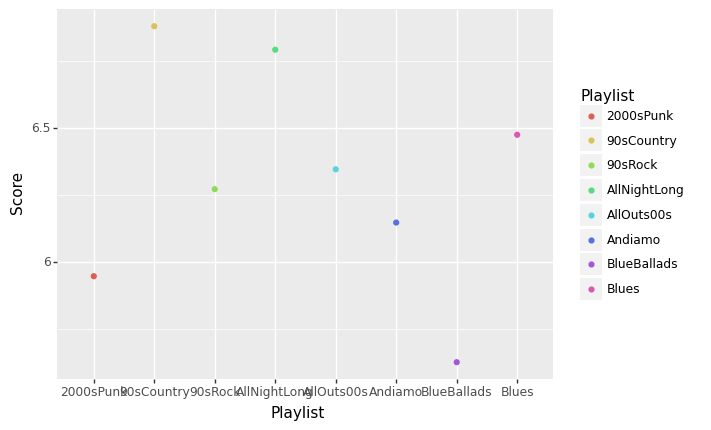

<ggplot: (-9223363308976421102)>

In [ ]:
plot_1

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


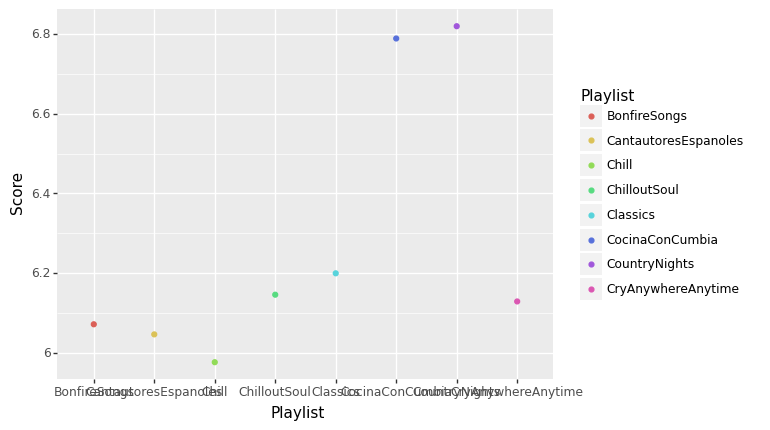

<ggplot: (-9223363308976421053)>

In [ ]:
plot_2

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


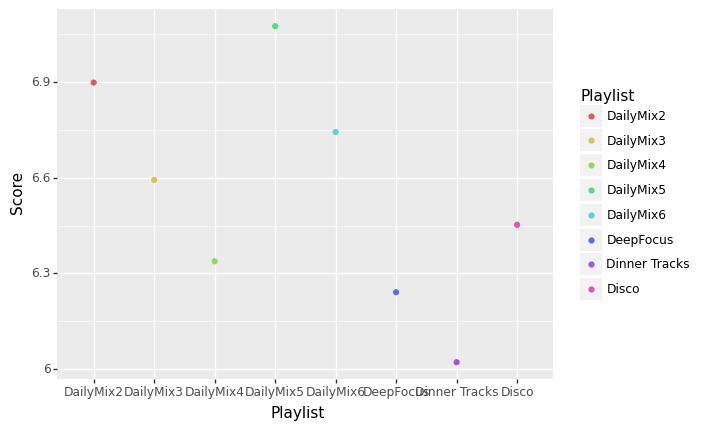

<ggplot: (-9223363308976421004)>

In [ ]:
plot_3

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


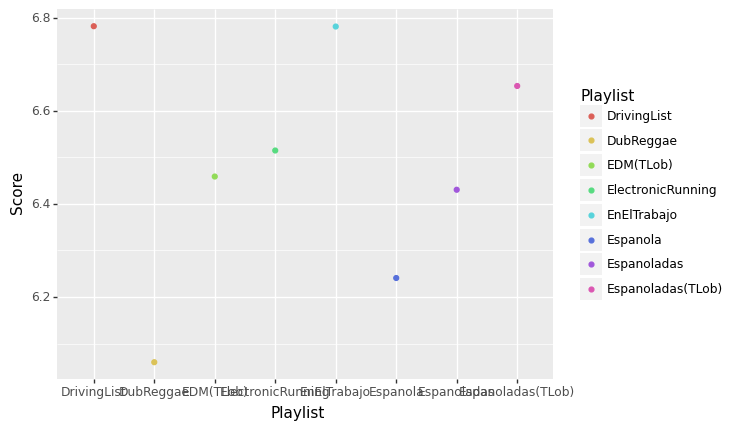

<ggplot: (-9223363308976420955)>

In [ ]:
plot_4

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


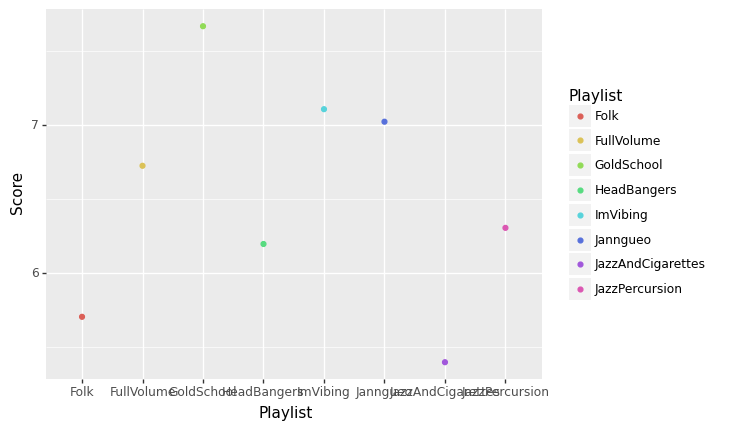

<ggplot: (8727878354892)>

In [ ]:
plot_5

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


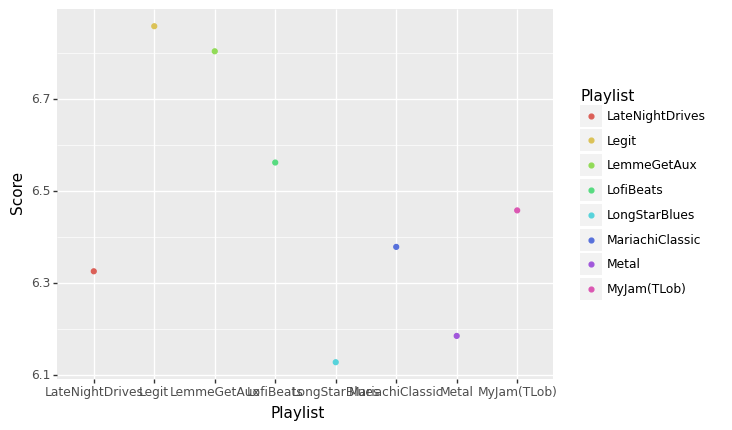

<ggplot: (8727878354941)>

In [ ]:
plot_6

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


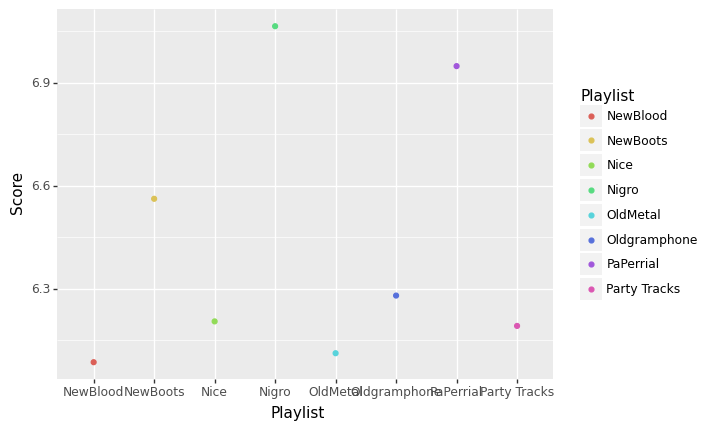

<ggplot: (8727878350898)>

In [ ]:
plot_7

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


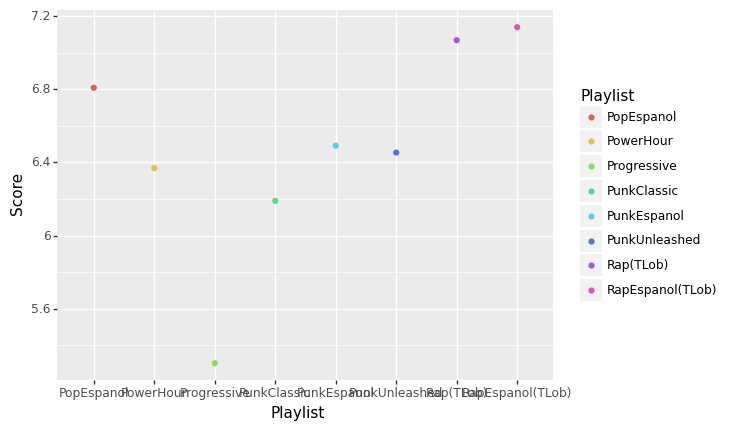

<ggplot: (8727878350947)>

In [ ]:
plot_8

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


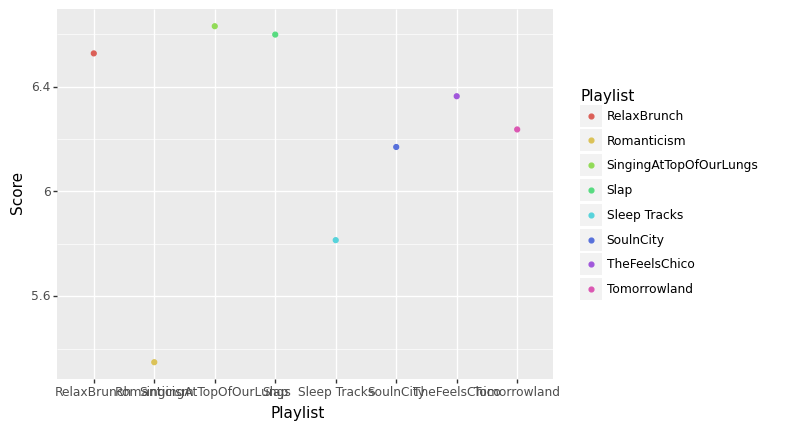

<ggplot: (8727878350996)>

In [ ]:
plot_9

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


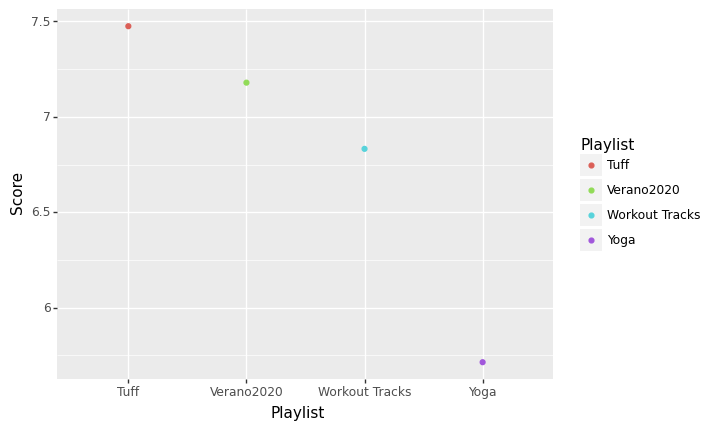

<ggplot: (8727878351045)>

In [ ]:
plot_10

From all of these we select these ones sicne they are very far apart:
* **Tuff, Yoga, Punk Espanol, Rap Espanol(TLob), Metal, Janngueo, DubReggae, DailyMix3, DailyMix5, CountryNights**

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


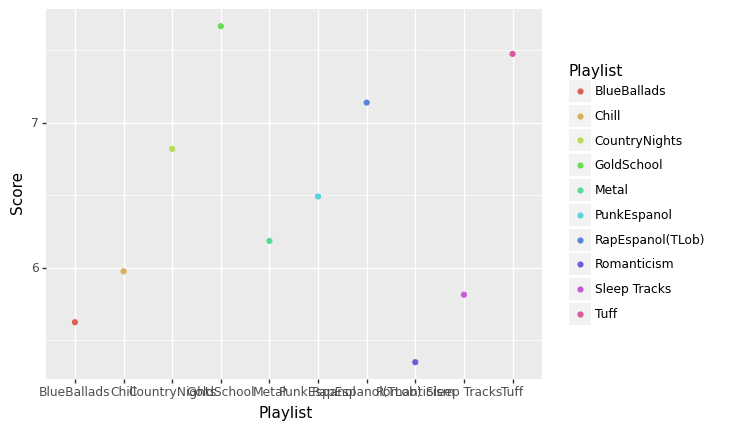

<ggplot: (-9223363308980682517)>

In [ ]:

chosen_pls = ['Tuff', 'BlueBallads', 'PunkEspanol', 'RapEspanol(TLob)', 'Metal', 'Romanticism', 'Sleep Tracks', 'GoldSchool', 'Chill', 'CountryNights']
#chosen_pls = ['Tuff', 'Yoga', 'PunkEspanol', 'RapEspanol(TLob)', 'Metal', 'Janngueo', 'DubReggae', 'DailyMix3', 'DailyMix5', 'CountryNights'] Martín
#chosen_pls = ['PowerHour', 'BonfireSongs', 'Blues', 'Yoga', 'EDM', 'Espanola', 'Janngueo', 'LofiBeats', 'Metal', 'PunkUnleashed'] Jimmy
scores_10_pl_df = scores_df.loc[scores_df['Playlist'].isin(chosen_pls) ]
ggplot(scores_10_pl_df, aes(x='Playlist', y='Score', color='Playlist', fill='Playlist')) + geom_point(alpha=1)
                  